# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users:
Telco Company in the USA offering triple play (phone, internet and TV)


#### True business problem:
New competitor entered offering triple play, resulting in increased churn.  
Want better way to spot potential churning customers and suggested actions what to do.


#### Context:

- **False negative:** Model marks non-churn when the customer actually churned.
    - **Outcome**: Understates which customers churn
- **False positive:** Model marks churn when the customer actually did not churn.
    - **Outcome**: Overstates which customers churn

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- Recall: Optimize for high recall, since we want low false negatives
- F1-Score

## Part 3: Segment choice

What slice/segment/type of churn you are interested in?

## Part 4: Data Prep Code

In [1]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Adding extra variables
# telco['calls_over_tenure'] = telco['TotalCall'] / telco['tenure']
# telco['revenue_over_tenure'] = telco['TotalRevenue'] / telco['tenure']
# telco['cust_calls_over_tenure'] = telco['CustomerServiceCalls'] / telco['tenure']


# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Clean X_train
# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

# Clean X_test
# Encode categorical variables
encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

# Reassemble entire testing dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

clean_X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1099 non-null   int64  
 1   tenure                                 1099 non-null   int64  
 2   NumbervMailMessages                    1099 non-null   int64  
 3   TotalDayMinutes                        1099 non-null   float64
 4   TotalDayCalls                          1099 non-null   int64  
 5   TotalEveMinutes                        1099 non-null   float64
 6   TotalEveCalls                          1099 non-null   int64  
 7   TotalNightMinutes                      1099 non-null   float64
 8   TotalNightCalls                        1099 non-null   int64  
 9   TotalIntlMinutes                       1099 non-null   float64
 10  TotalIntlCalls                         1099 non-null   int64  
 11  Cust

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Part 5: Create models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
%matplotlib inline

X_columns = clean_X_train.columns

vanilla_mod = LogisticRegression(solver='liblinear', penalty='l2', class_weight='balanced')
vanilla_mod.fit(clean_X_train[X_columns], y_train)

vanilla_y_hat_train = vanilla_mod.predict(clean_X_train[X_columns])
vanilla_y_hat_test = vanilla_mod.predict(clean_X_test[X_columns])

pd.DataFrame(zip(clean_X_train[X_columns].columns, *vanilla_mod.coef_)).sort_values(1, ascending=False)

,0,1
40,InternationalPlan_Yes,1.334928
33,StreamingMovies_Yes,1.332327
20,InternetService_Fiber optic,0.822444
11,CustomerServiceCalls,0.334372
36,PaperlessBilling_Yes,0.317972
27,DeviceProtection_Yes,0.179511
29,TechSupport_Yes,0.160472
38,PaymentMethod_Electronic check,0.121129
0,SeniorCitizen,0.115790
25,OnlineBackup_Yes,0.069246


TRAINING RESULTS:
Confusion matrix:


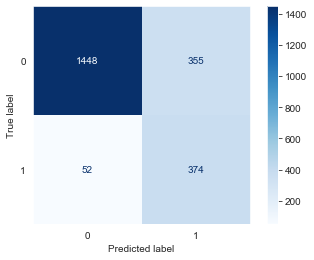

Precision: 0.5130
Recall: 0.8779
Accuracy: 0.8174
F1 score: 0.6476
AUC: 0.9114


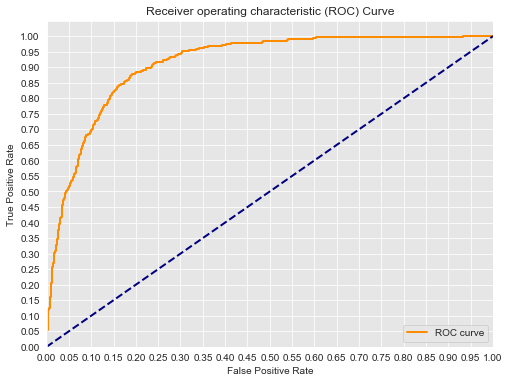



TESTING RESULTS:
Confusion matrix:


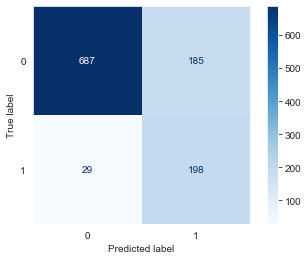

Precision: 0.5170
Recall: 0.8722
Accuracy: 0.8053
F1 score: 0.6492
AUC: 0.8992


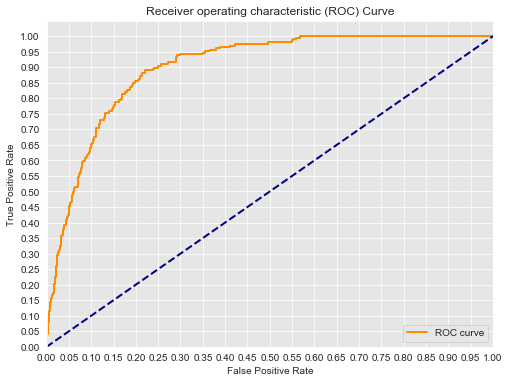

In [3]:
print('TRAINING RESULTS:')
print('Confusion matrix:')
plot_confusion_matrix(vanilla_mod, clean_X_train, y_train,
                      cmap=plt.cm.Blues,
                      values_format=".0f")
plt.grid(False)
plt.show()
print(f'Precision: {precision_score(y_train, vanilla_y_hat_train):.4f}')
print(f'Recall: {recall_score(y_train, vanilla_y_hat_train):.4f}')
print(f'Accuracy: {accuracy_score(y_train, vanilla_y_hat_train):.4f}')
print(f'F1 score: {f1_score(y_train, vanilla_y_hat_train):.4f}')
y_score = vanilla_mod.decision_function(clean_X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_score)
print(f'AUC: {auc(fpr, tpr):.4f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('\n', "=" * 20, '\n')

print('TESTING RESULTS:')
print('Confusion matrix:')
plot_confusion_matrix(vanilla_mod, clean_X_test, y_test,
                      cmap=plt.cm.Blues,
                      values_format=".0f")
plt.grid(False)
plt.show()
print(f'Precision: {precision_score(y_test, vanilla_y_hat_test):.4f}')
print(f'Recall: {recall_score(y_test, vanilla_y_hat_test):.4f}')
print(f'Accuracy: {accuracy_score(y_test, vanilla_y_hat_test):.4f}')
print(f'F1 score: {f1_score(y_test, vanilla_y_hat_test):.4f}')
y_score = vanilla_mod.decision_function(clean_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(f'AUC: {auc(fpr, tpr):.4f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Part 6: Pick model & find best threshold

## Part 7: What drives churn?

## Part 8: What are your recommendations?